# Exclusively online enrollments over time (four-year institutions only, undergraduates only)

## Prepared by Charlie Eaton and Christian Michael Smith

In [1]:
ssc install blindschemes

checking blindschemes consistency and verifying not already installed...
all files already exist and are up to date.


In [2]:
use data/hdefa_dist20122019.dta, clear

In [3]:
qui {
drop if control<1
replace control=4 if iclevel>1 //Note that this includes <2yr institutions, and does not differentiate by for-profit/public status
collapse (sum) efdeexcu, by(year control)
reshape wide efdeexcu, i(year) j(control)
label var efdeexcu4 "community     "
label var efdeexcu3 "for-profit    "
label var efdeexcu2 "nonprofit (private)"
label var efdeexcu1 "nonprofit (public)"  
}

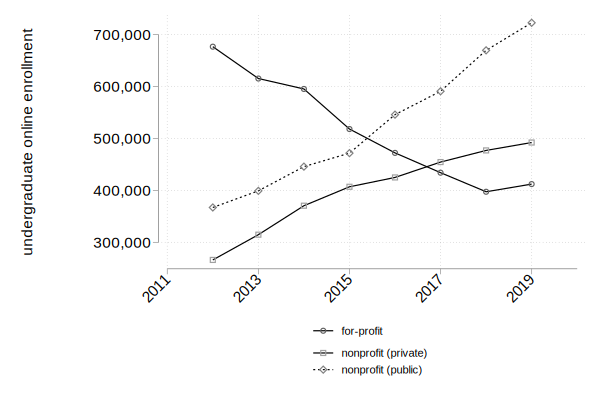

In [4]:
tw (connect efdeexcu3 efdeexcu2 efdeexcu1 year if year>2011 & year<2020, sort ///
legend(pos(6) size(small) order(1 4 2 3)) xlabel(2011(2)2020, ang(45) labsize(medium)) ///
ytitle("undergraduate online enrollment" " " " " "  ", size(medium)) ylabel(, format(%10.0fc) labsize(medium)) ///
xtitle("")  note("") scheme(plotplain))